In [1]:
# import preprocessor as p
import json
import string
import re
from nltk import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
import unicodedata

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
# File name can be changed to dataset2 for 2nd dataset
f = open('data.json') 
data = json.load(f)

In [3]:
#Emoji patterns
emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)

In [4]:
def preprocess_tweet(text):

    # Check characters to see if they are in punctuation
    nopunc = [char for char in text if char not in (string.punctuation)]
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    # convert text to lower-case
    nopunc = nopunc.lower()
    # nopunc = nopunc.decode()
    # remove URLs
    nopunc = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', '', nopunc)
    nopunc = re.sub(r'http\S+', '', nopunc)
    #remove emojis from tweet
    nopunc = emoji_pattern.sub(r'', nopunc)
    # remove usernames
    nopunc = re.sub('@[^\s]+', '', nopunc)
    # remove the # in #hashtag
    nopunc = re.sub(r'#([^\s]+)', r'\1', nopunc)
    # remove repeated characters
    nopunc = word_tokenize(nopunc)
    # remove stopwords from final word list
    return [word for word in nopunc if word not in stopwords.words('english')]

In [5]:
# For testing purposes only
text = "https://t.co/PkCS43chvm #OLA #ElectricScooter From Martial Art\u2026s to Lathmar, unique Holi traditions in India | OMG! Is that Real?"
value = preprocess_tweet(text)
print(value)

['ola', 'electricscooter', 'martial', 'art…s', 'lathmar', 'unique', 'holi', 'traditions', 'india', 'omg', 'real']


In [6]:
for i in data['dataset']:
  l = unicodedata.normalize('NFKD',i['corpus'] ).encode('ascii', 'ignore')
  # print(l)
  var=preprocess_tweet(str(l)[2:])
  # print(var)
  
  i['corpus']=var

In [7]:
print(data)
unik = []
for i in data['dataset']:
  unik.extend(i['corpus'])
print(len(unik))
unik = set(unik)
print(len(unik))
unik = list(unik)
print(unik)

# print(set(unik))
# print(list(set(unik)))

{'dataset': [{'user': 453998026, 'corpus': ['europechris', 'cant', 'quite', 'call', 'misogyny', 'call', 'patriarchal', 'patronising', 'pompous', 'pete3291', 'cant', 'quite', 'call', 'misogyny', 'call', 'patriarchal', 'patronising', 'pompous', 'fionaandstu', 'cant', 'quite', 'call', 'misogyny', 'call', 'patriarchal', 'patronising', 'pompous', 'jighost22', 'cant', 'quite', 'call', 'misogyny', 'call', 'patriarchal', 'patronising', 'pompous', 'short2cjs', 'commonsspeaker', 'cant', 'quite', 'call', 'misogyny', 'call', 'patriarchal', 'patronisi', 'andyjey', 'cant', 'quite', 'call', 'misogyny', 'call', 'patriarchal', 'patronising', 'pompous', 'mirrorpolitics', 'cant', 'quite', 'call', 'misogyny', 'call', 'patriarchal', 'patronising', 'pomp', 'silverrich39', 'cant', 'quite', 'call', 'misogyny', 'call', 'patriarchal', 'patronising', 'pompou', 'geoffnorcott', 'cant', 'quite', 'call', 'misogyny', 'call', 'patriarchal', 'patronising', 'pompou', 'zero4', 'cant', 'quite', 'call', 'misogyny', 'call',

In [8]:
print(len(data['dataset']))

stats = {}
proba = {}
for i in unik:
  stats[i] =[]
  present = 0
  for x in range(len(data['dataset'])):
    # print(data['dataset'][x]['corpus'])
    if(i in data['dataset'][x]['corpus']):
      stats[i].append(1)
      present+=1
    else:
      stats[i].append(0)
  proba[i] = present/len(data['dataset'])


296


In [9]:
from collections import OrderedDict
d_descending = OrderedDict(sorted(proba.items(), key=lambda proba: proba[1], reverse=True))

In [10]:
d_descending

OrderedDict([('one', 0.42567567567567566),
             ('like', 0.3918918918918919),
             ('us', 0.375),
             ('new', 0.3614864864864865),
             ('time', 0.3614864864864865),
             ('get', 0.3581081081081081),
             ('dont', 0.3581081081081081),
             ('good', 0.34121621621621623),
             ('people', 0.34121621621621623),
             ('would', 0.3344594594594595),
             ('know', 0.3108108108108108),
             ('day', 0.30743243243243246),
             ('ukraine', 0.2972972972972973),
             ('see', 0.2905405405405405),
             ('im', 0.28378378378378377),
             ('think', 0.27702702702702703),
             ('first', 0.27702702702702703),
             ('today', 0.27364864864864863),
             ('back', 0.2668918918918919),
             ('make', 0.25675675675675674),
             ('even', 0.2533783783783784),
             ('need', 0.25),
             ('amp', 0.25),
             ('well', 0.25),
             ('

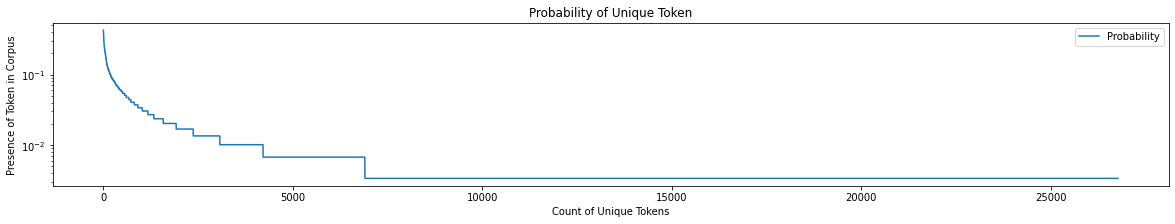

In [17]:
import matplotlib.pylab as plt

lists = sorted(proba.items(), key=lambda proba: proba[1], reverse=True) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

# plt.plot(x, y)
plt.rcParams["figure.figsize"] = (20,3)
plt.semilogy()
plt.plot(range(len(x)),y, label="Probability")
plt.xlabel("Count of Unique Tokens")
plt.ylabel("Presence of Token in Corpus")
plt.title("Probability of Unique Token")
plt.legend()
plt.show()

In [12]:
print(lists)

[('one', 0.42567567567567566), ('like', 0.3918918918918919), ('us', 0.375), ('new', 0.3614864864864865), ('time', 0.3614864864864865), ('get', 0.3581081081081081), ('dont', 0.3581081081081081), ('good', 0.34121621621621623), ('people', 0.34121621621621623), ('would', 0.3344594594594595), ('know', 0.3108108108108108), ('day', 0.30743243243243246), ('ukraine', 0.2972972972972973), ('see', 0.2905405405405405), ('im', 0.28378378378378377), ('think', 0.27702702702702703), ('first', 0.27702702702702703), ('today', 0.27364864864864863), ('back', 0.2668918918918919), ('make', 0.25675675675675674), ('even', 0.2533783783783784), ('need', 0.25), ('amp', 0.25), ('well', 0.25), ('great', 0.25), ('also', 0.24662162162162163), ('still', 0.24324324324324326), ('could', 0.23986486486486486), ('thanks', 0.23310810810810811), ('war', 0.23310810810810811), ('russia', 0.23310810810810811), ('n', 0.22635135135135134), ('much', 0.22635135135135134), ('go', 0.22297297297297297), ('world', 0.2195945945945946),

In [13]:
json_file = open("dataset1_pre.json", "a")
json_file.write(json.dumps(data))
json_file.close()